In [1]:
import pandas as pd
import sklearn
from matplotlib import pyplot as plt

In [2]:
'''from IPython.display import Image
Image('logit.png')
'''

"from IPython.display import Image\nImage('logit.png')\n"

In [3]:
df = pd.read_csv('shoe.csv')

In [4]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


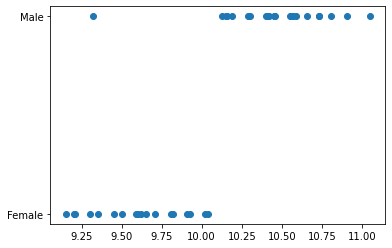

In [5]:
plt.scatter(df['size(cm)'], df['class(y)'])

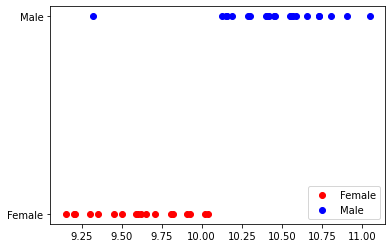

In [6]:
df0 = df[df['class(y)'] == 'Female']
df1 = df[df['class(y)'] == 'Male']

plt.scatter(df0['size(cm)'], df0['class(y)'], color='red', label='Female')
plt.scatter(df1['size(cm)'], df1['class(y)'], color='blue', label='Male')

plt.legend()


In [7]:
#preprocessing
df['class(y)'] = df['class(y)'].replace(['Male', 'Female'], [1,0])

In [8]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain,xtest,ytrain,ytest = train_test_split(df[['size(cm)']], df['class(y)'], test_size=.30)

In [11]:
xtrain.head()

,size(cm)
7,10.57
27,10.81
36,9.21
0,9.50
26,10.29


In [12]:
ytrain.head()

7     1
27    1
36    0
0     0
26    1
Name: class(y), dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
reg = LogisticRegression()

In [15]:
reg.fit(xtrain, ytrain)

LogisticRegression()

In [16]:
reg.coef_

array([[2.13141187]])

In [17]:
reg.intercept_

array([-21.01523127])

In [18]:
reg.predict_proba(xtest)

array([[0.60995112, 0.39004888],
       [0.35010011, 0.64989989],
       [0.63991413, 0.36008587],
       [0.52649537, 0.47350463],
       [0.63498834, 0.36501166],
       [0.22131445, 0.77868555],
       [0.46264757, 0.53735243],
       [0.21766312, 0.78233688],
       [0.23252995, 0.76747005],
       [0.521179  , 0.478821  ],
       [0.81947767, 0.18052233],
       [0.28124164, 0.71875836]])

In [19]:
reg.predict(xtest)

array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1])

In [20]:
ytest

9     0
20    1
33    0
3     0
38    0
28    1
17    0
25    1
11    1
10    0
5     0
18    1
Name: class(y), dtype: int64

In [21]:
logit = reg.score(xtest, ytest)
logit

0.9166666666666666

# KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn_neigh = KNeighborsClassifier(n_neighbors=7)
knn_neigh.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [28]:
knn_neigh.predict_proba(xtest)

array([[0.85714286, 0.14285714],
       [0.42857143, 0.57142857],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.        , 1.        ],
       [0.57142857, 0.42857143],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.85714286, 0.14285714],
       [0.85714286, 0.14285714],
       [0.        , 1.        ]])

In [29]:
knn_neigh.predict(xtest)


array([0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1])

In [30]:
ytest

9     0
20    1
33    0
3     0
38    0
28    1
17    0
25    1
11    1
10    0
5     0
18    1
Name: class(y), dtype: int64

In [32]:
knn = knn_neigh.score(xtest,ytest)
knn

1.0

# Make Visualization for KNN & Logistic Reg 

In [33]:
# initialize list of lists
data = [['Logistic Regression', logit], ['KNN Classifier', knn]]
  
# Create the pandas DataFrame
df1 = pd.DataFrame(data, columns=['Algorithms Name', 'Accuracy'])
  
# print dataframe.
df1

,Algorithms Name,Accuracy
0,Logistic Regression,0.916667
1,KNN Classifier,1.000000


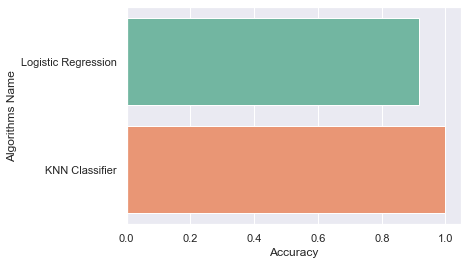

In [35]:
import seaborn as sns
sns.set()
sns.barplot(y="Algorithms Name", x="Accuracy", data = df1, palette="Set2")
sns.set(rc={'figure.figsize':(15,5)})